In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [2]:
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [3]:
df= pd.read_excel('D:\\data science\\csv\\Sample_Superstore.xls')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
furniture = df.loc[df['Category']=='Furniture']

In [7]:
col = ['Row ID', 'Order ID','Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name','Quantity', 'Discount', 'Profit']

In [8]:
furniture.shape

(2121, 21)

In [9]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
Row ID           2121 non-null int64
Order ID         2121 non-null object
Order Date       2121 non-null datetime64[ns]
Ship Date        2121 non-null datetime64[ns]
Ship Mode        2121 non-null object
Customer ID      2121 non-null object
Customer Name    2121 non-null object
Segment          2121 non-null object
Country          2121 non-null object
City             2121 non-null object
State            2121 non-null object
Postal Code      2121 non-null int64
Region           2121 non-null object
Product ID       2121 non-null object
Category         2121 non-null object
Sub-Category     2121 non-null object
Product Name     2121 non-null object
Sales            2121 non-null float64
Quantity         2121 non-null int64
Discount         2121 non-null float64
Profit           2121 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 364.5

In [10]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [11]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [12]:
furniture.drop(col, axis=1, inplace=True)

C:\Users\Working\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
furniture.head()

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [14]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [15]:
furniture.sort_values('Order Date').head()

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [16]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [17]:
#indexing with time series data
furniture = furniture.set_index('Order Date')
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [18]:
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [19]:
y = furniture['Sales'].resample('MS').mean()

In [20]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

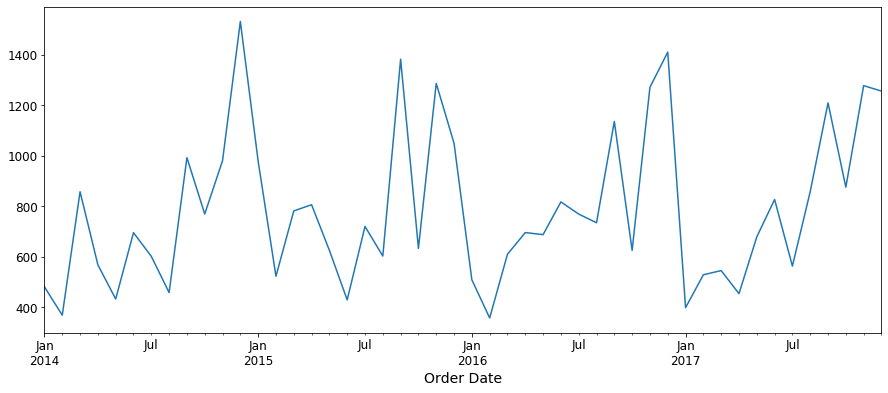

In [21]:
y.plot(figsize=(15,6))
plt.show()

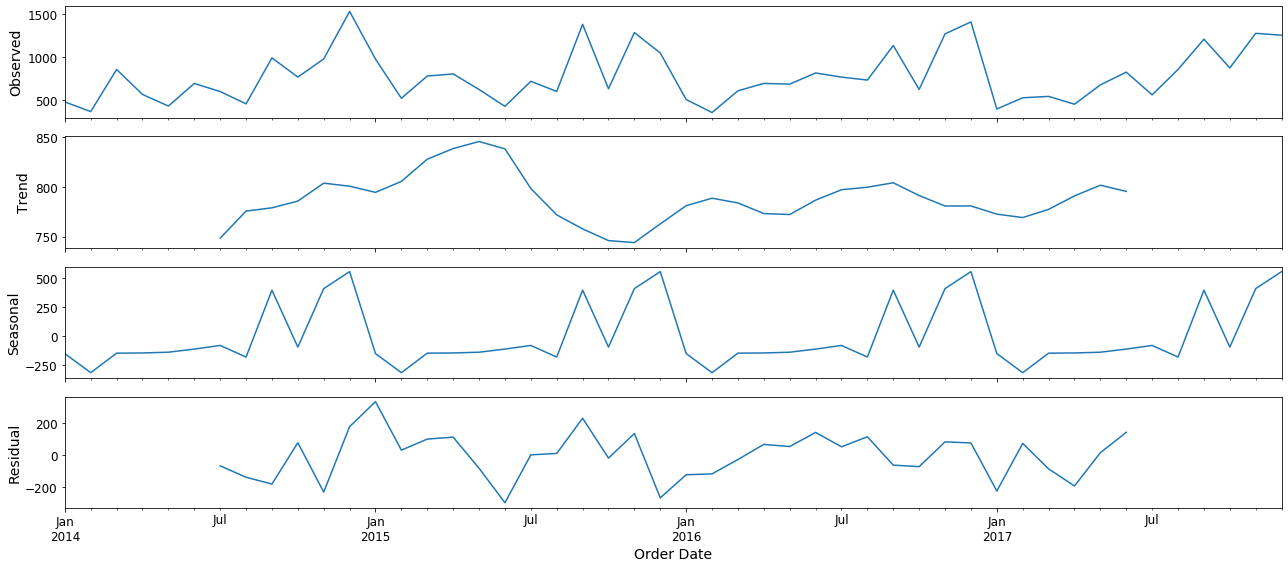

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8

decompostion = sm.tsa.seasonal_decompose(y, model='additive')
fig = decompostion.plot()
plt.show()

In [23]:
#time series forcasting using ARIMA Model
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [26]:
print('Examples of parameter combinations for seasonal ARIMA..')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA..
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{} x{}12 - AIC {}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0) x(0, 0, 0, 12)12 - AIC 769.0817523205916


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x(0, 0, 1, 12)12 - AIC 1576.7324642473277
ARIMA(0, 0, 0) x(0, 1, 0, 12)12 - AIC 477.71701309202774
ARIMA(0, 0, 0) x(1, 0, 0, 12)12 - AIC 497.23144334183365


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0) x(1, 0, 1, 12)12 - AIC 1478.1277236759956
ARIMA(0, 0, 0) x(1, 1, 0, 12)12 - AIC 318.0047199116341
ARIMA(0, 0, 1) x(0, 0, 0, 12)12 - AIC 720.9252270758104
ARIMA(0, 0, 1) x(0, 0, 1, 12)12 - AIC 2786.7230874852653
ARIMA(0, 0, 1) x(0, 1, 0, 12)12 - AIC 466.56074298091505


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1) x(1, 0, 0, 12)12 - AIC 499.59412606125284
ARIMA(0, 0, 1) x(1, 0, 1, 12)12 - AIC 2768.427220528199
ARIMA(0, 0, 1) x(1, 1, 0, 12)12 - AIC 319.98848769468674
ARIMA(0, 1, 0) x(0, 0, 0, 12)12 - AIC 677.894766843944


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x(0, 0, 1, 12)12 - AIC 1378.5486237111134
ARIMA(0, 1, 0) x(0, 1, 0, 12)12 - AIC 486.63785671879367
ARIMA(0, 1, 0) x(1, 0, 0, 12)12 - AIC 497.78896630044073


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0) x(1, 0, 1, 12)12 - AIC 1022.8611228052164
ARIMA(0, 1, 0) x(1, 1, 0, 12)12 - AIC 319.7714068109211
ARIMA(0, 1, 1) x(0, 0, 0, 12)12 - AIC 649.905617681726
ARIMA(0, 1, 1) x(0, 0, 1, 12)12 - AIC 3216.0197782079413
ARIMA(0, 1, 1) x(0, 1, 0, 12)12 - AIC 458.8705548482984
ARIMA(0, 1, 1) x(1, 0, 0, 12)12 - AIC 486.1832977442631


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1) x(1, 0, 1, 12)12 - AIC 2589.717123007444
ARIMA(0, 1, 1) x(1, 1, 0, 12)12 - AIC 310.7574368417452
ARIMA(1, 0, 0) x(0, 0, 0, 12)12 - AIC 692.1645522067713


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x(0, 0, 1, 12)12 - AIC 1450.0255396955233
ARIMA(1, 0, 0) x(0, 1, 0, 12)12 - AIC 479.46321478521355
ARIMA(1, 0, 0) x(1, 0, 0, 12)12 - AIC 480.92593679351836


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0) x(1, 0, 1, 12)12 - AIC 1352.209230823926
ARIMA(1, 0, 0) x(1, 1, 0, 12)12 - AIC 304.46646750845986
ARIMA(1, 0, 1) x(0, 0, 0, 12)12 - AIC 665.779444218529


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) x(0, 0, 1, 12)12 - AIC 2688.1953106578308
ARIMA(1, 0, 1) x(0, 1, 0, 12)12 - AIC 468.3685195814159
ARIMA(1, 0, 1) x(1, 0, 0, 12)12 - AIC 482.57633238765646


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1) x(1, 0, 1, 12)12 - AIC nan
ARIMA(1, 0, 1) x(1, 1, 0, 12)12 - AIC 306.01560022074426
ARIMA(1, 1, 0) x(0, 0, 0, 12)12 - AIC 671.2513547541902


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x(0, 0, 1, 12)12 - AIC 1455.1241321469415
ARIMA(1, 1, 0) x(0, 1, 0, 12)12 - AIC 479.20034222811347
ARIMA(1, 1, 0) x(1, 0, 0, 12)12 - AIC 475.34036587849016


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0) x(1, 0, 1, 12)12 - AIC 1356.0287228411075
ARIMA(1, 1, 0) x(1, 1, 0, 12)12 - AIC 300.62709013453934
ARIMA(1, 1, 1) x(0, 0, 0, 12)12 - AIC 649.0318019835137
ARIMA(1, 1, 1) x(0, 0, 1, 12)12 - AIC 21749.90908195544
ARIMA(1, 1, 1) x(0, 1, 0, 12)12 - AIC 460.4762687610251
ARIMA(1, 1, 1) x(1, 0, 0, 12)12 - AIC 469.5250354660837


C:\Users\Working\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1) x(1, 0, 1, 12)12 - AIC 2592.9586233250657
ARIMA(1, 1, 1) x(1, 1, 0, 12)12 - AIC 297.787543953291


In [31]:
#fitting the ARIMA Model
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


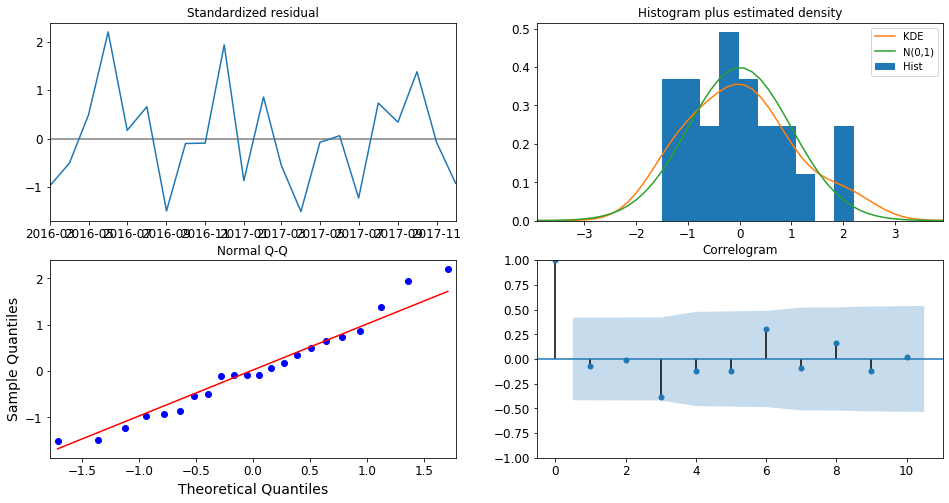

In [36]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

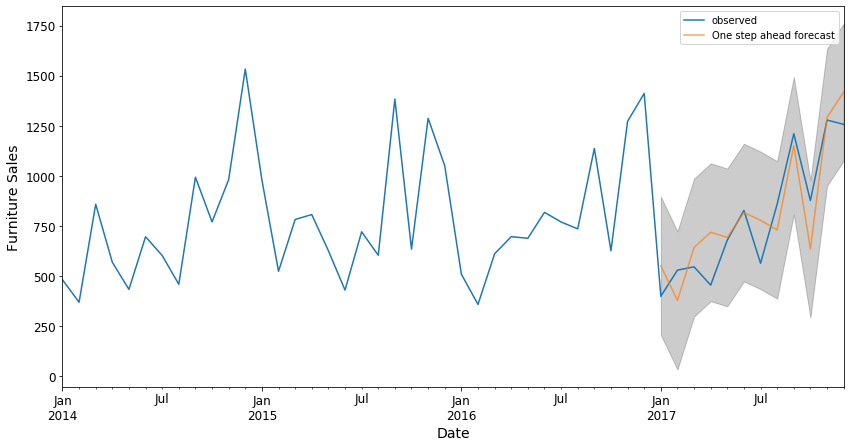

In [35]:
#building validated forcasts
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One step ahead forecast', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k',alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()